hello
hi
22.800764337610172
15.454453045350098
23.92232008425721
39.03819940271012
70.00059011857647
-6.615896448326087
-8.139425640670442
22.754045235137443
77.51898161794583
-24.795838229052915
-14.894076388974362
60.70289742829745
68.73704222181048
21.95866642051321
27.154982593440014
4.390187120514037
23.884570435167788
79.01284645843083
81.83449120712208
71.92877844178355
_________
85.89260872533873
77.48992075393372
110.25765487142993
108.76404730399352
246.62494210201632
-172.8313769590864
-70.6521255205518
154.65353624706424
184.78225822086978
-219.85710724180166
-102.09119032959237
34.624299892175785
-101.09239753909819
-158.06023954370482
43.54929235035264
41.496727349704315
-70.4138813686906
236.95772747842645
21.181831785249834
205.37205088362492


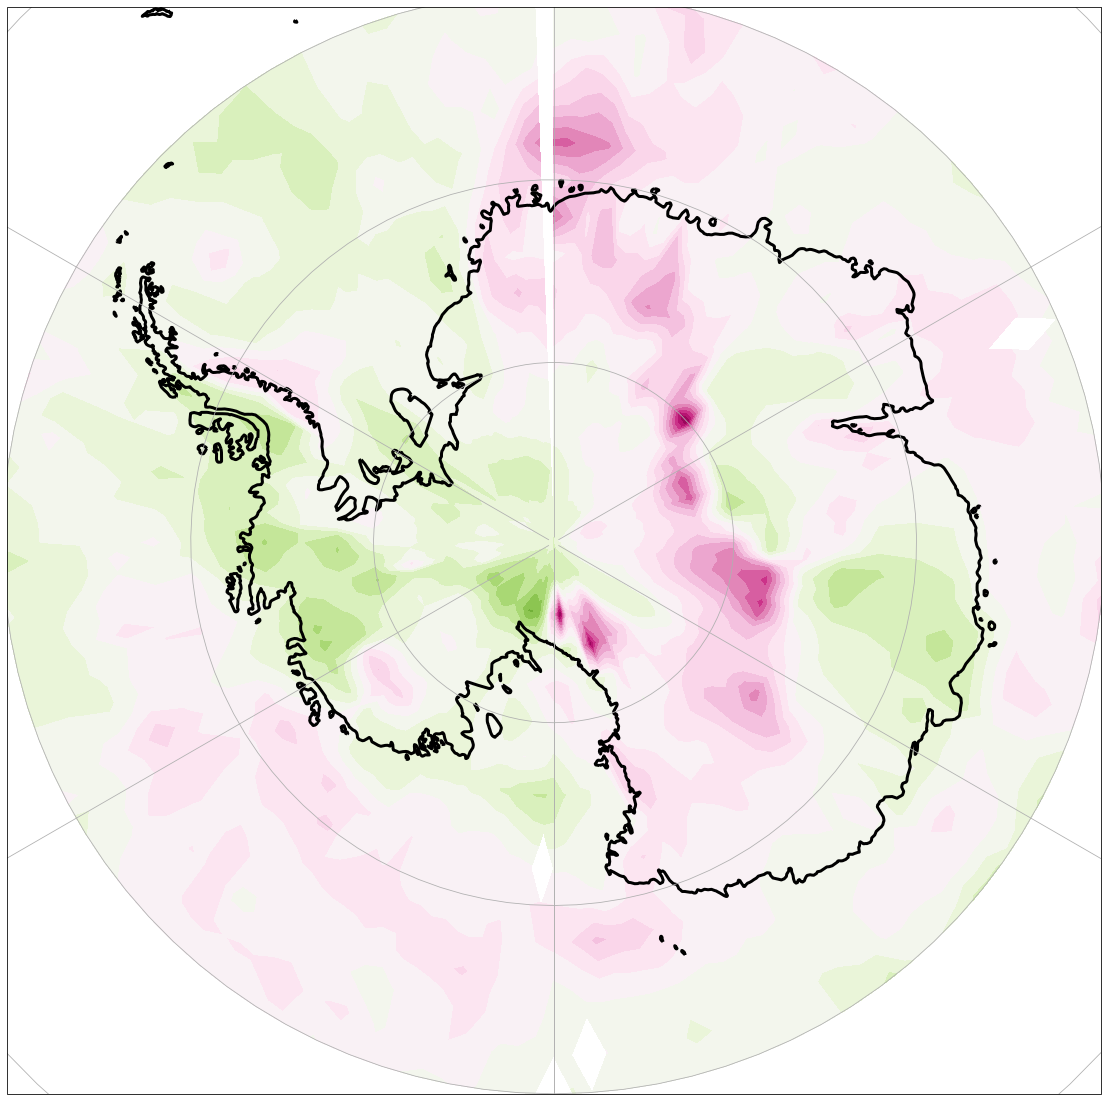

In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Plots spatial maps of reconstruction skill through comparison with ERA5
def tempPlot(): 

    means = np.load('ensemble_mean_pr_sfc_Amon.npz', allow_pickle=True)
    
    newNC = nc.Dataset('adaptor.mars.internal-1663556282.2356336-8299-12-f0261241-78f1-43ef-8b90-b2d6b9b5d118.nc')

    
    subsample = newNC.variables['tp'][:, 0:121:8, 0:1440:8]
    
    maskKey = subsample[0, 0, 0]
    for i in range(16):
        for j in range(180):
            if subsample[0, i, j] == maskKey:
                subsample[:, i, j] = np.nan
                
    predictYear = 0
                
    tempsAvg = np.mean(subsample[264:504], axis=0) 
    #temps80 = np.mean(subsample[252:264], axis=0)
    temps00 = np.mean(subsample[(predictYear*12-108):(predictYear*12-96)], axis=0)
    
    era5 = np.zeros((20, 16, 180))
    #print("hi")
    for i in range(20):
        era5[i] = np.mean(subsample[(i*12+264):(i*12+276)], axis=0) 

    era5 = np.subtract(era5, tempsAvg)
    era5 = np.flip(era5, axis=1)
    era5 = np.roll(era5, 90, axis=2)
    
    
    
    coeffs = np.zeros((16, 180))
    coeffs2 = np.zeros((16, 180))
    
    ceNum = np.zeros((16, 180))
    ceDen = np.zeros((16, 180))
    ce = np.zeros((16, 180))
    ce2 = np.zeros((16, 180))
    print("hi")
    ps = np.zeros((16,180))
    
    #print(era5[0, 0, 0])
    #print(means['xam'][0,0,0])
    
    
    era5 = np.multiply(era5, 288000)
    
    
    #for i in range(20):
        #print(era5[i, 9, 160])
    
    
    improv1 = np.zeros((16, 180))
    
    ps = np.zeros((16, 180))

    """
    for i in range(16):
        for j in range(180):
            #era5[:, i, j] = np.add(era5[:, i, j], np.mean(np.multiply(means['xam'][81:101, i, j], 31536), axis=0))
            
            corr = np.corrcoef(means['xam'][80:, i, j], era5[:, i, j])[0,1]
            coeffs[i, j] = corr
            
            if i == 7 and j == 0:
                for k in range(20):
                    print(np.multiply(means['xam'][k+80, i, j], 31356000))
                print("______________")
                for k in range(20):
                    print(era5[k, i, j])
            
            #if corr > 0.562:
                #ps[i,j] = 1.0
            #elif corr > 0.444:
                #ps[i,j] = 0.5
            
                
            
            #corr2 = np.corrcoef(means2['xam'][80:, i, j], era5[:, i, j])[0,1]
            #coeffs2[i, j] = corr2
            
          
    #corrChange = coeffs - coeffs2
    """
    
    era5 = np.add(era5, np.multiply(np.mean(means['xam'][80:, :16], axis=0), 31356000))
    
    
    #print(means['lon'][:, 137])
    #print(means['lat'][8])
    
    for i in range(20):
        print(np.multiply(means['xam'][80+i, 8, 139], 31356000))
    print("_________")
    for i in range(20):
        print(era5[i, 8, 139])


    
    
    #print(era5[:, 8, 135])
    #print(np.multiply(means['xam'][:, 8, 135], 31536000))
    
    
    
    for i in range(16):

        for j in range(180):
            
            corr = np.corrcoef(means['xam'][80:, i, j], era5[:, i, j])[0,1]
            coeffs[i, j] = corr
            
            #corr2 = np.corrcoef(means2['xam'][80:, i, j], era5[:, i, j])[0,1]
            #coeffs2[i, j] = corr2

            
            diff1 = np.square(era5[:, i, j] - np.multiply(means['xam'][80:, i, j], 31356000))
            diff2 = np.square(era5[:, i, j] - np.mean(era5[:, i, j], axis=0))

            ceTop = np.sum(diff1, axis=0)
            ceBot = np.sum(diff2, axis=0)
            
            ce[i, j] = 1 - (float(ceTop) / float(ceBot))
            #print(ce[i, j])
            
            if corr > 0.444:
                ps[i,j] = 1.0
            
            
            
            
            #diff3 = np.square(era5[:, i, j] - np.multiply(means2['xam'][80:, i, j], 31356000))
            #diff4 = np.square(era5[:, i, j] - np.mean(era5[:, i, j], axis=0))

            #ceTop2 = np.sum(diff3, axis=0)
            #ceBot2 = np.sum(diff4, axis=0)
            
            #ce2[i, j] = 1 - (float(ceTop2) / float(ceBot2))
            
            """
            ceTop = np.zeros(20)
            ceBot = np.zeros(20)
            
            for k in range(20):
        
                ceTop[k] = ((era5[k, i, j] - np.multiply(means['xam'][k+80, i, j], 31356000)) ** 2)
                ceBot[k] = ((era5[k, i, j]) - np.mean(era5[:, i, j], axis=0)) ** 2
                
                if i == 7 and j == 0:
                    print(ceTop)
                    print(ceBot)

                #print(ceBot[k])

            #print(np.sum(ceTop, axis=0))
            #print(np.sum(ceBot, axis=0))
            #print(ceTop)
            #print(ceBot)
            """
            
            #ceNum[i, j] = ceTop
            #ceDen[i, j] = ceBot
            
            
            #ce[i, j] = 1 - (float(ceNum[i, j]) / float(ceDen[i, j]))
            #print(ce[i,j])


            if ce[i,j] < -1.0:
                ce[i, j] = -1.0
            
            #if ce[i,j] > 1.0:
                #ce[i, j] = 0.9
    
    
    
    
    
    """
    for j in range(10):
        areaAvgs = np.zeros(16)
        for i in range(16):
            areaAvgs[i] = np.mean(np.multiply(means['xam'][j+81, i, :], 31536), axis=0) * ((-20 * (15-i) + 300) * 0.01941 + 1)
        #print(areaAvgs[i])
        #print(np.true_divide(np.sum(areaAvgs), 55.761))
        #naivAvgs[i] = np.nanmean(absNaiv[i]) * ((-20 * i + 300) * 0.01941 + 1)
    """
    
    
    #corrChange = coeffs - coeffs2
    #ceChange = ce - ce2
    
    
    


            
    #corrDiff = np.subtract(means['xam'], means2['xam'])
    #varrDiff = np.subtract(abs(corrDiff), np.true_divide(means['xav'], 2))
    #varSized = np.mean(varrDiff[:, 0:16], axis=0)
    #newVarr = np.where(varSized<0, 0, varSized)
    
    ce[0,0] = 1.0
    ce[0,1] = -1.0
 
    
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    #ax = plt.axes(projection=ccrs.PlateCarree())
    
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    #ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
    ax.gridlines()
    
    plt.rcParams['figure.figsize'] = [20, 20]


    plt.contourf(means['lon'][0:16], means['lat'][0:16], ce, levels=20, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap=plt.cm.PiYG)

    #plt.title("1960-1980")
    
    ax.coastlines(linewidth=3)
    
    plt.show()
    
    
    
    

    
    
    
tempPlot()